In [1]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
train_data= pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [42]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Labels
Each training and test example is assigned to one of the following labels:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

# splitting data into features and labels

In [45]:
train_x = train_data.iloc[:, 1:]
train_y = train_data.iloc[:, 0]

test_x = test_data.iloc[:, 1:]
test_y = test_data.iloc[:, 0]

In [46]:
print(train_x.shape, train_y.shape, '\n')
print(test_x.shape, test_y.shape, '\n')

(60000, 784) (60000,) 

(10000, 784) (10000,) 



# Preprocessing target labels using one-hot encoding / label_encoder

In [47]:
train_y.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

In [54]:
def one_hot_encode(label):
    vec = np.eye(10)
    return vec[label]

In [55]:
def plot_image(im):
    plt.imshow()

SyntaxError: unexpected EOF while parsing (<ipython-input-55-a3c6091dee60>, line 1)

In [8]:
l_c = dict()
l_c[0]='T-shirt/top'

In [9]:
l_c[0]

'T-shirt/top'

In [38]:
x_20= train_data.iloc[:20,1:]

In [34]:
# x1.shape
x20 = np.reshape(x1, (28,28,1))

In [35]:
x20.shape

(28, 28)

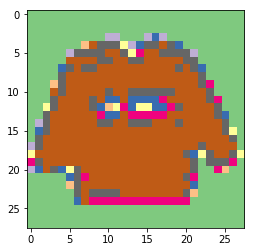

In [36]:
plt.imshow(x20, cmap='Accent')

IndexError: tuple index out of range